In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from mpl_toolkits.mplot3d import axes3d

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 24})

In [4]:
from sample_3d_view import sample_sphere, sample_torus, visualize_grid_sphere, visualize_grid_torus, sample_ellipsoid, genus_two, genus_three

In [5]:
from local_pca_utils import make_nearest_neighbors_graph, make_tangents, make_2nd_order_laplacian,make_general_order_laplacian, make_connection

from curvature_utils import make_tangents_and_normals, get_second_fundamental_form

from tensorlaplacian_utils import get_riemannian_ricci_scalar, get_weitzenbock_operator, get_eigvals_of_weitzenbock,weitzenbock_to_bsr

In [6]:
npoints = 5000

In [7]:
#data = sample_sphere(npoints, 2)
#data = sample_torus(npoints, 3, 1)
data = genus_two()
data *= 10

In [8]:
import h5py    
import numpy as np 
from dataset import Dataset
import os
root = os.getcwd()
dataset_name = 'shapenetcorev2'
split = 'test'

d = Dataset(root=root, dataset_name=dataset_name, num_points=2048, split=split)
ps, lb, n, f = d[:]
np.where(np.array(n)=='mug')
ps, lb, n, f = d[117]
data = ps.numpy()
data *= 15
npoints = data.shape[0]


In [9]:
data.shape

(2048, 3)

In [10]:
tensor_order = 1
manifold_dimension = 2
p = tensor_order
k = manifold_dimension

In [11]:
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 20, n=npoints)
_,_,_,_, h = get_second_fundamental_form(data, graph, k)
riem, ric, sc = get_riemannian_ricci_scalar(h)
weitzenbock = get_weitzenbock_operator(riem,k,p)
block_weitzenbock = weitzenbock_to_bsr(weitzenbock)
tangents = make_tangents(data, graph, k)
connection = make_connection(tangents, graph)
rough_lap = make_general_order_laplacian(connection, graph, p, sym=False, zero_trace=False)
#rough_lap = make_2nd_order_laplacian(connection, graph, sym=False, zero_trace=False)

100%|██████████| 2048/2048 [00:00<00:00, 7112.11it/s]


[[-0.4258003  0.9048171]
 [-0.9048171 -0.4258003]]
[[-0.67810875  0.73496157]
 [-0.73496157 -0.67810875]]
[[ 0.1625982  -0.98669237]
 [-0.98669237 -0.1625982 ]]
[[ 0.9989256   0.04634045]
 [ 0.04634045 -0.9989256 ]]
[[-0.9882371   0.15292916]
 [ 0.15292916  0.9882371 ]]
[[ 0.9814196   0.19187337]
 [ 0.19187337 -0.9814196 ]]
[[-0.4750291  0.87997  ]
 [ 0.87997    0.4750291]]
[[-0.4896525  -0.87191755]
 [-0.87191755  0.4896525 ]]
[[-0.9783849  0.2067919]
 [ 0.2067919  0.9783849]]
[[ 0.5727518  0.8197288]
 [-0.8197288  0.5727518]]
[[ 0.5558955  0.8312521]
 [-0.8312521  0.5558955]]
[[ 0.2761716  -0.96110827]
 [ 0.96110827  0.2761716 ]]
[[ 0.5428104   0.83985525]
 [-0.83985525  0.5428104 ]]
[[ 0.8622284  -0.50651973]
 [ 0.50651973  0.8622284 ]]
[[ 0.17058061  0.9853437 ]
 [ 0.9853437  -0.17058061]]
[[-0.36793482  0.92985153]
 [-0.92985153 -0.36793482]]
[[ 0.9971058   0.07602669]
 [-0.07602669  0.9971058 ]]
[[ 0.06249635 -0.9980452 ]
 [ 0.9980452   0.06249635]]
[[-0.7469254   0.66490775]
 [ 

In [14]:
#lichnerowicz = -rough_lap + block_weitzenbock
#lichnerowicz = -rough_lap
lichnerowicz = block_weitzenbock

In [15]:
block_weitzenbock.todense()

matrix([[ 0.04437997,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.04437997,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.01750817, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.00154651,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.00828719,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.00828719]])

In [23]:
rough_lap.todense()[60:90,90:100]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [24]:
rough_lap

<4096x4096 sparse matrix of type '<class 'numpy.float32'>'
	with 175336 stored elements (blocksize = 2x2) in Block Sparse Row format>

In [25]:
lichnerowicz.shape

(4096, 4096)

In [26]:
eigvals, eigvecs = scipy.sparse.linalg.eigs(lichnerowicz, k=10, which='SM',return_eigenvectors=True)

ArpackNoConvergence: ARPACK error -1: No convergence (40961 iterations, 0/10 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]

In [163]:
eigvals

array([-0.07396007+0.j, -0.08337361+0.j, -0.2017321 +0.j, -0.21091147+0.j,
       -0.3318423 +0.j, -0.34644547+0.j, -0.42191628+0.j, -0.48667267+0.j,
       -0.56512076+0.j, -0.5271625 +0.j], dtype=complex64)

In [164]:
npoints

2048

In [165]:
def get_field(eigvecs, index, npoints):
    eigvector = eigvecs[:,index]
    eigvector = eigvector.reshape(-1,2)
    killingfield = np.zeros((npoints, 3))
    
    print(tangents.shape, eigvector.shape)
    for i in range(npoints):
        killingfield[i] = tangents[i, 0]* eigvector[i, 0] +  tangents[i, 1]* eigvector[i, 1] 
    return killingfield

In [166]:
killingfield = get_field(eigvecs, 0, npoints)
visualizer = np.zeros((npoints, 6))
visualizer[:,:3] = data
visualizer[:,3:] = killingfield*100

(2048, 2, 3) (2048, 2)


/tmp/ipykernel_4137345/892268495.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  killingfield[i] = tangents[i, 0]* eigvector[i, 0] +  tangents[i, 1]* eigvector[i, 1]


In [167]:
visualizer[:,[1, 2]] = visualizer[:,[2, 1]]
visualizer[:,[4, 5]] = visualizer[:,[5, 4]]

In [168]:
X, Y, Z, U, V, W = zip(*visualizer[:])

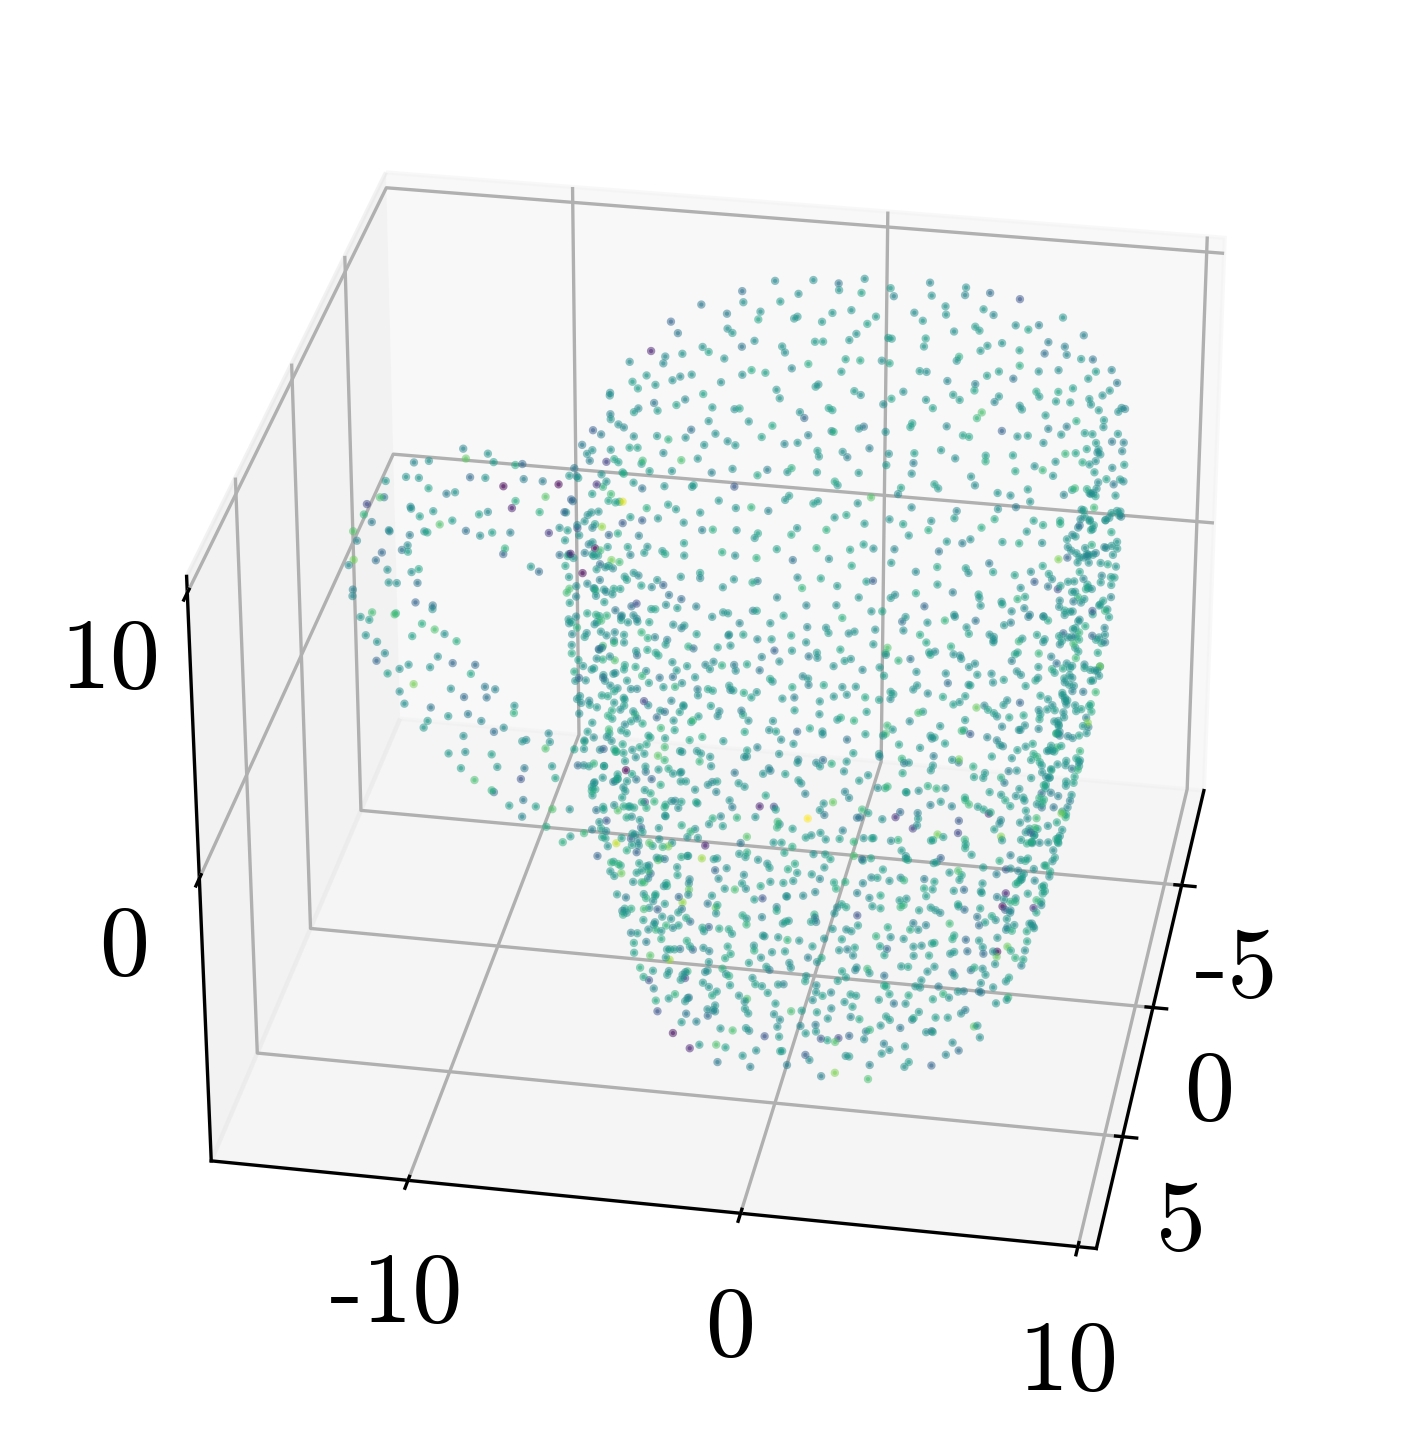

In [169]:
#fig, ax = visualize_grid_torus(30,3,1)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#ax.set_box_aspect([2,2,1])
#fig, ax = visualize_grid_torus(30,2,1)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10, alpha=0.5)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10,norm = mpl.colors.Normalize(vmin=-1, vmax=0, clip=False), alpha=0.5)
#ax.view_init(60, 60)
#ax.view_init(20, 100)
ax.scatter(data[:,0], data[:, 2], data[:,1], s=1, c=sc, cmap='viridis',zorder=10,norm = mpl.colors.Normalize(vmin=-.2, vmax=.2, clip=False), alpha=0.5)
ax.view_init(30, 10)

In [170]:
ax.quiver(X, Y, Z, U, V, W, color="C0", linewidth=0.6)

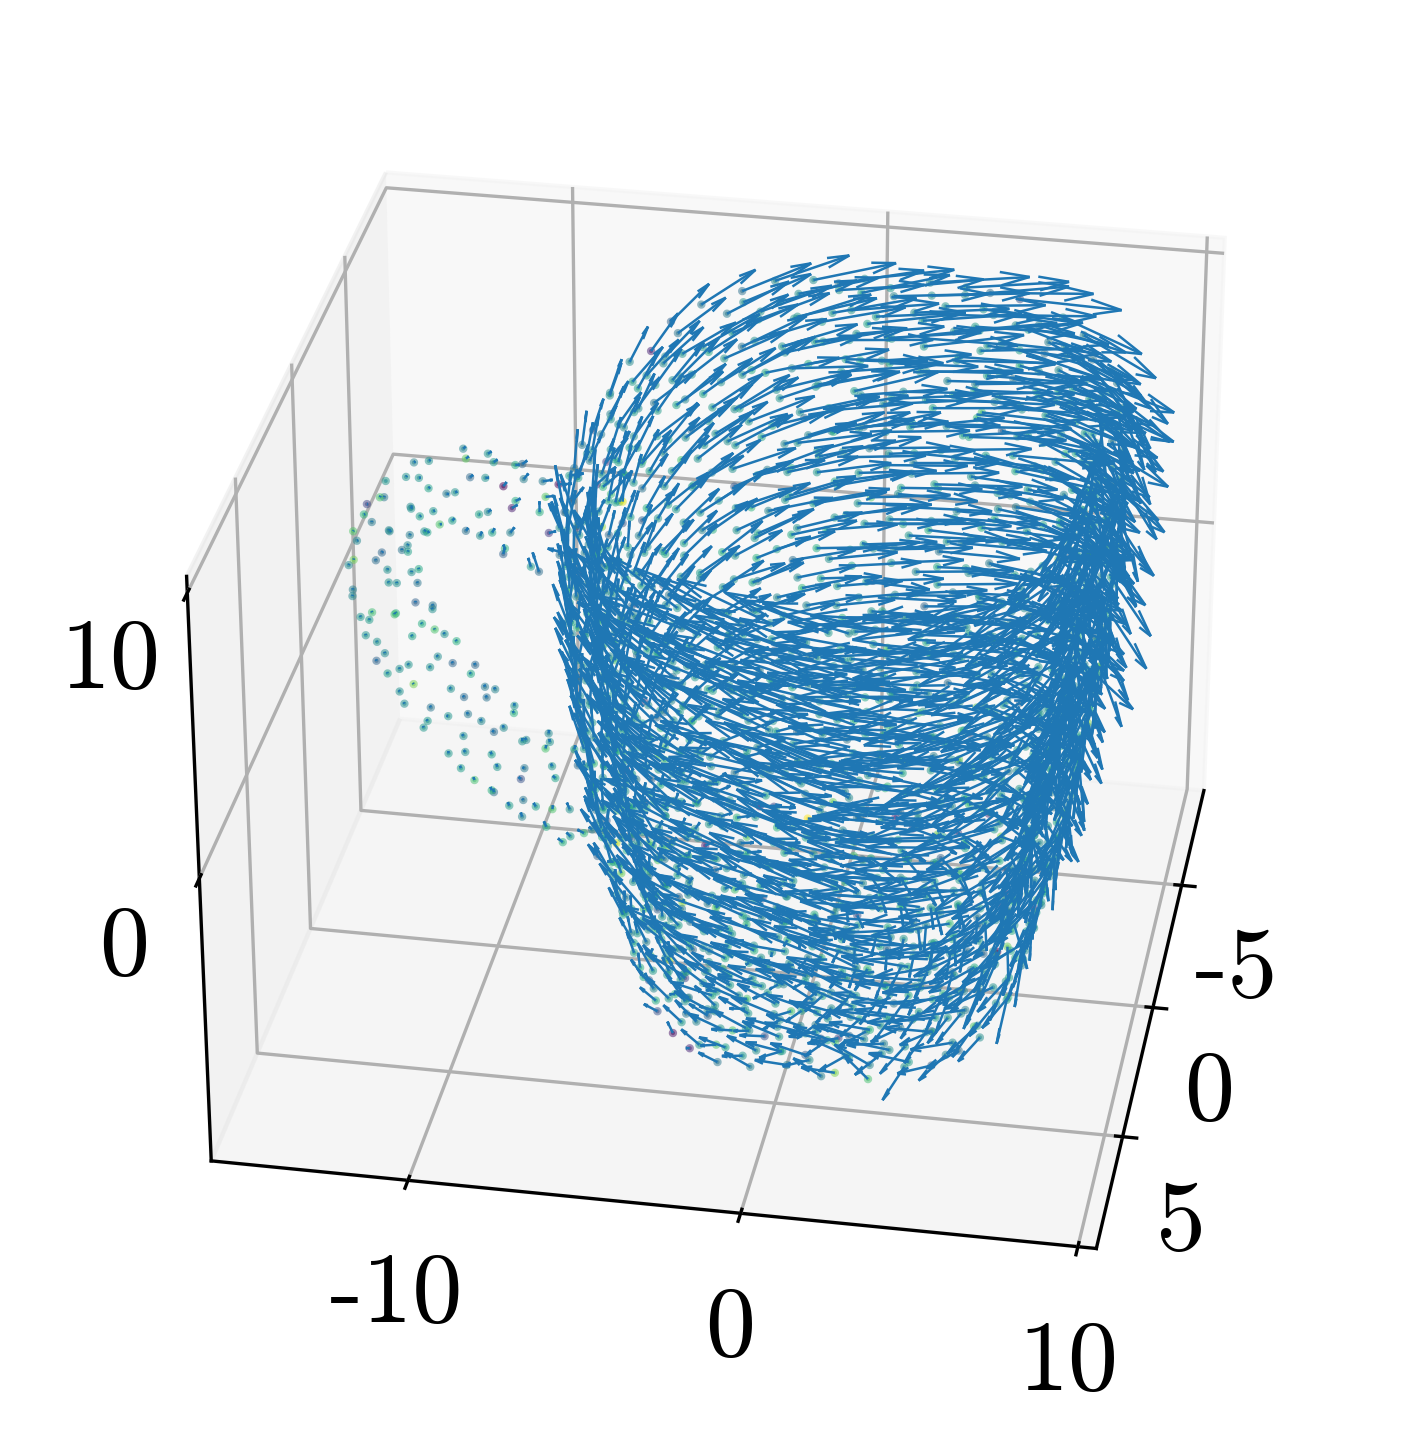

In [171]:
fig